# Tarea_13
## Francisco Ricardo Torres Arvizu

## __Ejercicio 1:__ Resolver oscilador amortiguado:
$$m \ddot x=-k x -b \dot x,$$
usando $m=k=b=1$ y $x_0=1$, $\dot x_0=0$.
Usen Euler Y Runge-Kutta orden 4, comparen las soluciones, es decir, grafiquen el espacio de fase para cada método y despues juntos.
__Nota:__ El método de Runge-Kutta esta dentro de la familia de métodos simplécticos, es decir, preserva el volumen en el espacio de fase, algo particularmente útil cuanto tenemos sistemas que conservan la energia, a diferencia de _Euler_ que no lo hace. Observen que al no haber cantidades conservadas para el oscilador amortiguado, Euler funcione mucho mejor que en el otro caso, pues el oscilador amortiguado no conserva el volumen del espacio de fase.

## Solución 
Se copian varias funciones de la tarea 12, las cuales nos permiten solucionar las ecuaciones diferenciales. 

In [2]:
using PyPlot
function RungeKuttaOrden2(g::Function, g1::Function, delta, t0,tf,y10,y20)
    t = []
    y1 = []
    y2 = [] 
    k11(t,u1,u2) = g(t,u1,u2)*delta
    k21(t,u1,u2)= g(t+delta/2,u1+(delta/2)*u2,u2+k11(t,u1,u2)/2)*delta
    k31(t,u1,u2)= g(t+delta/2,u1+(delta/2)*u2+(delta/4)*k11(t,u1,u2),u2+(k21(t,u1,u2)/2))*delta
    k41(t,u1,u2) = g(t+delta,u1+delta*u2+(delta/2)*k21(t,u1,u2),u2+k31(t,u1,u2))*delta
    k12(t,u1,u2)= g1(t,u1,u2)*delta
    k22(t,u1,u2)= g1(t+delta/2,u1+(delta/2)*u2,u2+k11(t,u1,u2)/2)*delta
    k32(t,u1,u2) = g1(t+delta/2,u1+(delta/2)*u2+(delta/4)*k11(t,u1,u2),u2+(k21(t,u1,u2)/2))*delta
    k42(t,u1,u2) = g1(t+delta,u1+delta*u2+(delta/2)*k21(t,u1,u2),u2+k31(t,u1,u2))*delta
    f1(t,u1,u2) = u1+1/6*(k11(t,u1,u2)+2*k21(t,u1,u2)+2*k31(t,u1,u2)+k41(t,u1,u2))
    f2(t,u1,u2) = u2+1/6*(k12(t,u1,u2)+2*k22(t,u1,u2)+2*k32(t,u1,u2)+k42(t,u1,u2))
    push!(t,t0)
    push!(y1,y10)
    push!(y2,y20)
    while(t[length(t)]<tf)
        push!(t, t[length(t)]+delta)
        push!(y1,f1(t[length(t)-1],y1[length(y1)],y2[length(y2)]))
        push!(y2,f2(t[length(t)-1],y1[length(y1)-1],y2[length(y2)]))    
    end
    figure()
    subplot(2,1,1)
    plot(t, y2, color = "blue")
    legend()
    title("Gráfica de la función")
    ylabel(L"f(x)")
    xlabel(L"t")
    grid()
    subplot(2,1,2)
    plot(t,y1, color="red")
    legend()
    ylabel(L"\frac{df(x)}{dt}")
    xlabel(L"t")
    title("Gráfica de la derivada de la función")
    grid() 
end
    

RungeKuttaOrden2 (generic function with 1 method)

Solucion del oscilador armònico amortiguado con el mètodo de Runge-Kutta.

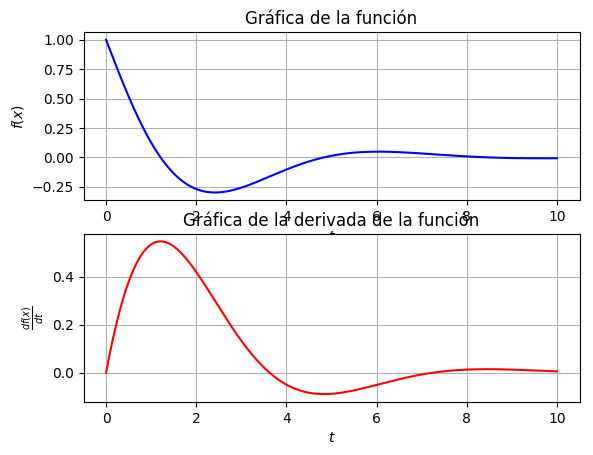

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [3]:
RungeKuttaOrden2((t,y1,y2)->y2,(t,y1,y2)->-y1-y2,0.001,0.0,10.0,0.0,1.0)

In [4]:
function euler2orden(f::Function,f2::Function,time0,timef,y10,y20,delta)
    y2=[]
    y1=[]
    t=[]
    push!(t,time0)
    push!(y1,y10)
     push!(y2,y20)
    while(t[length(t)]<timef)
        push!(t,t[length(t)]+delta)
        push!(y1,y1[length(y1)]+f(t[length(t)-1],y1[length(y1)],y2[length(y2)])*delta)
        push!(y2,y2[length(y2)]+f2(t[length(t)-1],y1[length(y1)-1],y2[length(y2)])*delta)
    end
    figure()
    subplot(2,1,1)
    plot(t, y2, color = "blue")
    legend()
    title("Gráfica de la función")
    ylabel(L"f(x)")
    xlabel(L"t")
    grid()
    subplot(2,1,2)
    plot(t,y1, color="red")
    legend()
    ylabel(L"\frac{df(x)}{dt}")
    xlabel(L"t")
    title("Gráfica de la derivada de la función")
    grid()
end

euler2orden (generic function with 1 method)

Solucion del oscilador armònico amortiguado con el mètodo de Euler.

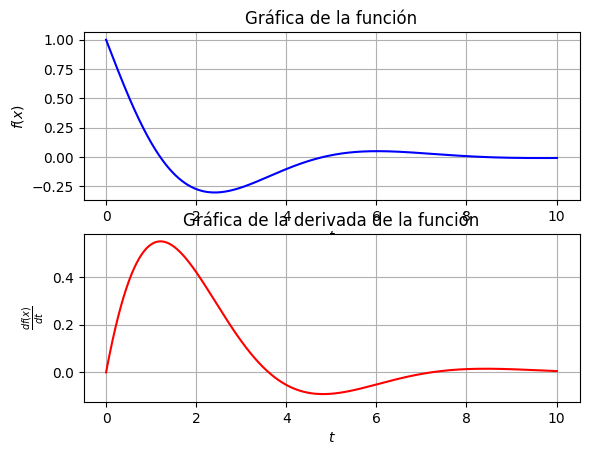

In [5]:
euler2orden((t,y1,y2)->y2,(t,y1,y2)->-y1-y2,0.0,10.0,0.0,1.0,0.01)

Con Espacio fase con el métedo de Runge Kutta

In [6]:
function espaciofaseoscilador3(g::Function,g1::Function,t0,tf,y10,y20,delta)
    t = []
    y1 = []
    y2 = [] 
    k11(t,u1,u2) = g(t,u1,u2)*delta
    k21(t,u1,u2)= g(t+delta/2,u1+(delta/2)*u2,u2+k11(t,u1,u2)/2)*delta
    k31(t,u1,u2)= g(t+delta/2,u1+(delta/2)*u2+(delta/4)*k11(t,u1,u2),u2+(k21(t,u1,u2)/2))*delta
    k41(t,u1,u2) = g(t+delta,u1+delta*u2+(delta/2)*k21(t,u1,u2),u2+k31(t,u1,u2))*delta
    k12(t,u1,u2)= g1(t,u1,u2)*delta
    k22(t,u1,u2)= g1(t+delta/2,u1+(delta/2)*u2,u2+k11(t,u1,u2)/2)*delta
    k32(t,u1,u2) = g1(t+delta/2,u1+(delta/2)*u2+(delta/4)*k11(t,u1,u2),u2+(k21(t,u1,u2)/2))*delta
    k42(t,u1,u2) = g1(t+delta,u1+delta*u2+(delta/2)*k21(t,u1,u2),u2+k31(t,u1,u2))*delta
    f1(t,u1,u2) = u1+1/6*(k11(t,u1,u2)+2*k21(t,u1,u2)+2*k31(t,u1,u2)+k41(t,u1,u2))
    f2(t,u1,u2) = u2+1/6*(k12(t,u1,u2)+2*k22(t,u1,u2)+2*k32(t,u1,u2)+k42(t,u1,u2))
    push!(t,t0)
    push!(y1,y10)
    push!(y2,y20)
    while(t[length(t)]<tf)
        push!(t, t[length(t)]+delta)
        push!(y1,f1(t[length(t)-1],y1[length(y1)],y2[length(y2)]))
        push!(y2,f2(t[length(t)-1],y1[length(y1)-1],y2[length(y2)])) 
    end
    return y2, y1, t 
end

espaciofaseoscilador3 (generic function with 1 method)

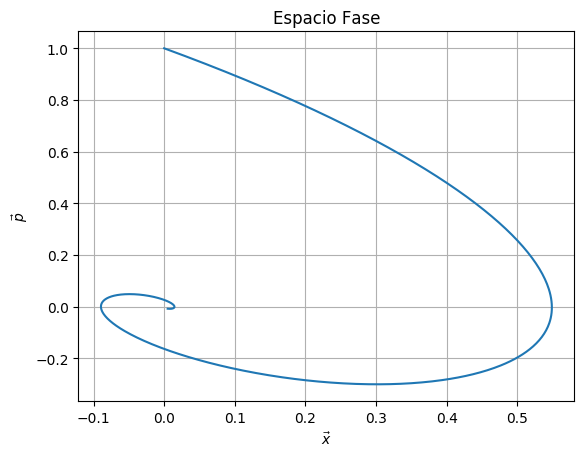

In [7]:
plot(espaciofaseoscilador3((t,y1,y2)->y2,(t,y1,y2)->-y1-y2,0.0,10.0,0.0,1.0,0.01)[2],espaciofaseoscilador3((t,y1,y2)->y2,(t,y1,y2)->-y1-y2,0.0,10.0,0.0,1.0,0.01)[1])
      legend()
      title("Espacio Fase")
      ylabel(L"\vec{p}")
      xlabel(L"\vec{x}")
     grid()

Espacio fase con el método de Euler

In [8]:
function espaciofase4(f::Function,f2::Function,time0,timef,y10,y20,delta)
    y2=[]
    y1=[]
    t=[]
    push!(t,time0)
    push!(y1,y10)
     push!(y2,y20)
    while(t[length(t)]<timef)
        push!(t,t[length(t)]+delta)
        push!(y1,y1[length(y1)]+f(t[length(t)-1],y1[length(y1)],y2[length(y2)])*delta)
        push!(y2,y2[length(y2)]+f2(t[length(t)-1],y1[length(y1)-1],y2[length(y2)])*delta)
    end
    return y2, y1, t 
end

espaciofase4 (generic function with 1 method)

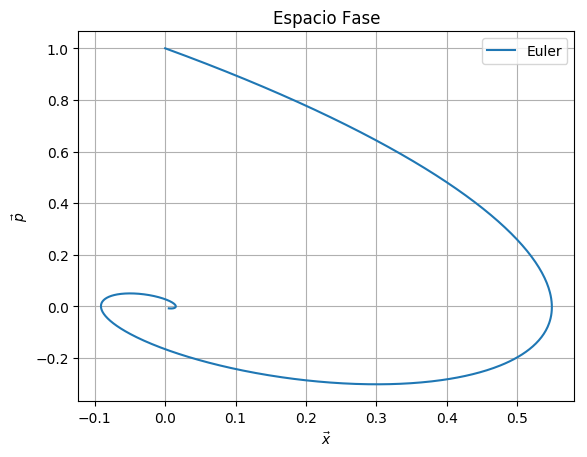

In [9]:
plot(espaciofase4((t,y1,y2)->y2,(t,y1,y2)->-y1-y2,0.0,10.0,0.0,1.0,0.01)[2],espaciofase4((t,y1,y2)->y2,(t,y1,y2)->-y1-y2,0.0,10.0,0.0,1.0,0.01)[1],label="Euler")
      legend()
      title("Espacio Fase")
      ylabel(L"\vec{p}")
      xlabel(L"\vec{x}")
     grid()

Con ambos métodos. 

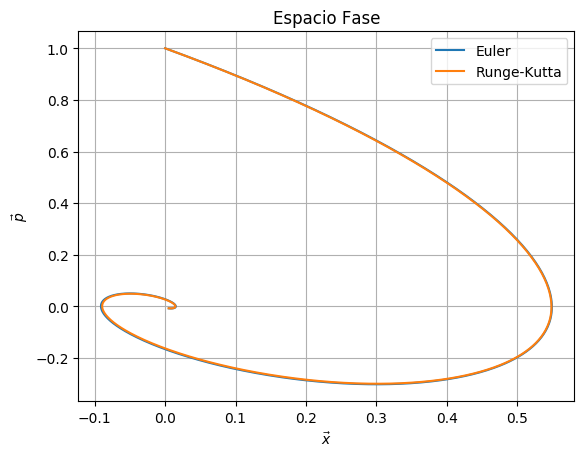

In [10]:
plot(espaciofase4((t,y1,y2)->y2,(t,y1,y2)->-y1-y2,0.0,10.0,0.0,1.0,0.01)[2],espaciofase4((t,y1,y2)->y2,(t,y1,y2)->-y1-y2,0.0,10.0,0.0,1.0,0.01)[1],label="Euler")
plot(espaciofaseoscilador3((t,y1,y2)->y2,(t,y1,y2)->-y1-y2,0.0,10.0,0.0,1.0,0.01)[2],espaciofaseoscilador3((t,y1,y2)->y2,(t,y1,y2)->-y1-y2,0.0,10.0,0.0,1.0,0.01)[1], label="Runge-Kutta")
      legend()
      title("Espacio Fase")
      ylabel(L"\vec{p}")
      xlabel(L"\vec{x}")
     grid()

## __Ejercicio 2:__ Resolver el péndulo simple:
$$l \ddot\theta=-g \sin(\theta),$$
usando Runge-Kutta orden 4. Gráficar muchas condiciones iniciales (lo mas facil es que sean aleatorias) en el espacio de fase usando $l=g=1$. Ajuste el rango de la gráfica para que se centre cerca del cero para que se puedan observar los dos tipos de movimiento presentes. Coménte e interprete las soluciones.

## Solución

In [11]:
function grafica(g::Function,g1::Function,t0,tf,y10,y20,delta,a,b)
    n=abs(b-a)
    for i in 1:n
      plot(espaciofaseoscilador3(g,g1,t0,tf,rand(a:b),rand(a:b),delta)[2],espaciofaseoscilador3(g,g1,t0,tf,rand(a:b),rand(a:b),delta)[1])
      legend()
      title("Espacio Fase")
      ylabel(L"\vec{p}")
      xlabel(L"\vec{x}")
     grid()
    end 
end

grafica (generic function with 1 method)

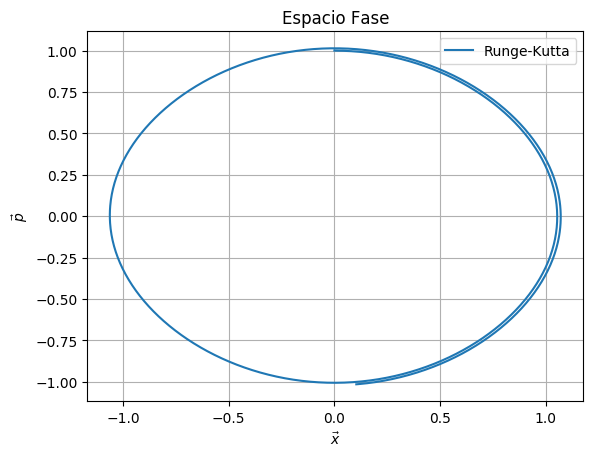

In [45]:
plot(espaciofaseoscilador3((t,y1,y2)->y2,(t,y1,y2)->-sin(y1),0.0,10.0,0.0,1,0.01)[2],espaciofaseoscilador3((t,y1,y2)->y2,(t,y1,y2)->-sin(y1),0.0,10.0,0.0,1,0.01)[1], label="Runge-Kutta")
      legend()
      title("Espacio Fase")
      ylabel(L"\vec{p}")
      xlabel(L"\vec{x}")
     grid()

In [13]:
function grafica2(f::Function,f2::Function,time0,timef,y10,y20,delta)
   
    for i in 1:15
      plot(espaciofase4(f,f2,time0,timef,y10,y20+i*(0.1),delta)[2],espaciofase4(f,f2,time0,timef,y10,y20+i*(0.1),delta)[1])
      legend()
      title("Espacio Fase")
      ylabel(L"\vec{p}")
      xlabel(L"\vec{x}")
     grid()
        ax = gca()
    
        # add new limits from 0 - 100
     ax[:set_xlim]([-6,6])
    end 
end

grafica2 (generic function with 1 method)

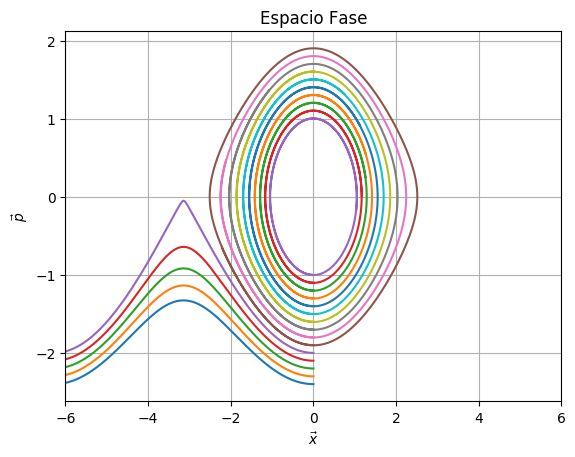

In [49]:
grafica2((t,y1,y2)->y2,(t,y1,y2)->-sin(y1),-6,6.0,0.0,-2.5,0.001)

## Discusión
Se observa que la trayectoria en el espacio fase es simétrica respecto de un eje vertical. La simetría dice , que el movimiento del péndulo es el mismo en el sentido de las agujas del reloj que en sentido contrario. En el espacio fase también se puede observar el movimiento de rotación apartir de ciertas condiciones inciales. 

## Ejercicio 3: 
Comprobar numéricamente (con Runge-Kutta orden  44 ) que en el sistema:
dxdt=x2−1,
dxdt=x2−1,
 
hay dos puntos fijos, ubicados en  11  y  −1−1 , compruebe además que el  11  es un repulsor y el  −1−1  un atractor. Para hacer esto necesitará graficar muchas condiciones iniciales, generelas aleatoriamente y gráfiquelas en el espacio  (x(t),t)(x(t),t) .

## Solución 

In [15]:
function espaaciofaserungeKutta1(f::Function,t0,tf,y0,delta)
    yarreglo=[]
    tarreglo=[]
    push!(yarreglo,y0)
    push!(tarreglo,t0)
    k1(t,y) = f(t,y)
    k2(t,y) = f(t+(delta/2),y+((delta/2)*k1(t,y)))
    k3(t,y) = f(t+(delta/2),y+((delta/2)*k2(t,y)))
    k4(t,y) = f(t+(delta),y+(delta)*k3(t,y))
    h1(t,y)=k1(t,y)+2*k2(t,y)+2*k3(t,y)+k4(t,y)
    while (tarreglo[length(tarreglo)]<tf)
        push!(tarreglo,tarreglo[length(tarreglo)]+delta)
        push!(yarreglo,yarreglo[length(yarreglo)]+(delta/6)*h1(tarreglo[length(tarreglo)],yarreglo[length(yarreglo)]))
    end
   return tarreglo, yarreglo
end

espaaciofaserungeKutta1 (generic function with 1 method)

In [50]:
function grafica4(f::Function,t0,tf,y0,delta)
 
    for i in 1:20
      
      plot(espaaciofaserungeKutta1(f,t0,tf,y0+i*0.1,delta)[2],espaaciofaserungeKutta1(f,t0,tf,y0+0.1*i,delta)[1] )
      legend()
      title("Espacio Fase")
      ylabel(L"t")
      xlabel(L"f(t)")
      grid()
      ax = gca()
    
        # add new limits from 0 - 100
     ax[:set_xlim]([-5,5])
    end 
end

grafica4 (generic function with 1 method)

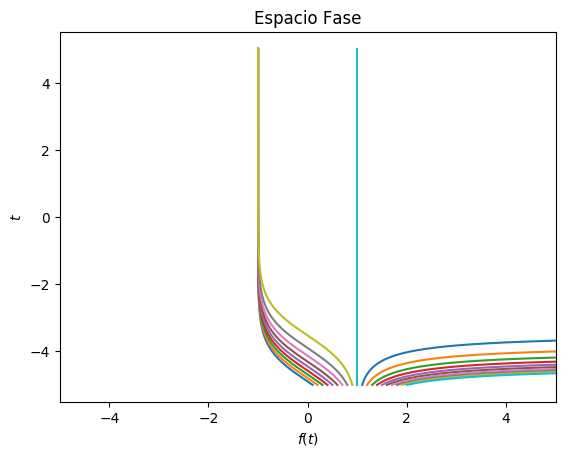

In [51]:
grafica4((t,y)->y^2-1,-5.0,5.0,0.0,0.01)

## Ejercicio 4: 
También con Runge-Kutta orden $4, $Resuelva numéricamente el sistema:
$$\frac{dx}{dt}=x^2,$$
cual es el punto fijo único?, es un _atractor_ o un _repulsor_?. Utilice de igual forma muchas condiciones iniciales y gráfiquelas en el mismo espacio que en el ejercicio anterior.

## Solución

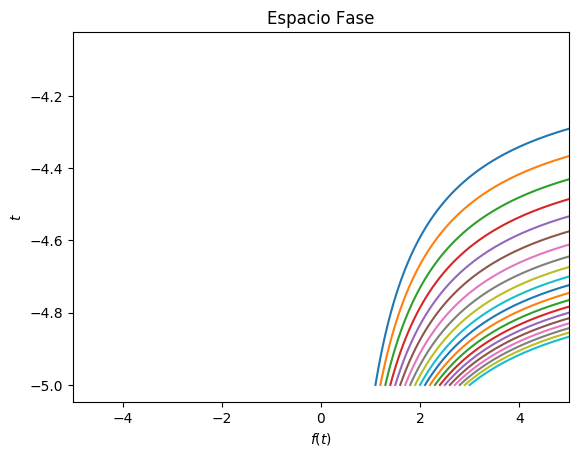

In [52]:
grafica4((t,y)->y^2,-5.0,5.0,1,0.01) 

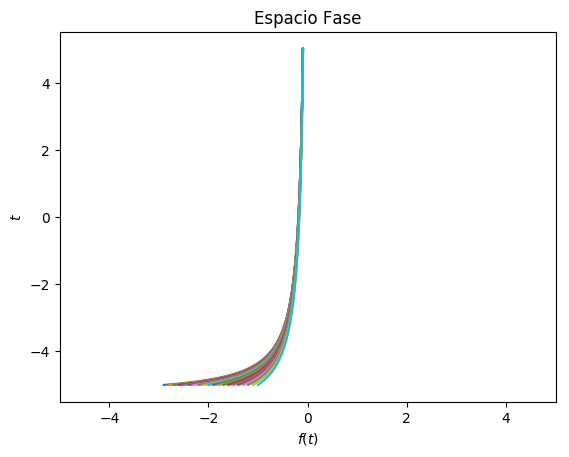

In [53]:
grafica4((t,y)->y^2,-5.0,5.0,-3,0.01)

## Discusión 
Si la condición incial es negativa parecen converger a $0$  o si es positiva parece que en $0$ las solucione diveren. Entonces, $0$ no es atractor ni repulsor.

## __Ejercicio 5:__
Resolver con Runge-Kutta orden $4$ el sistema de ecuaciones:
$$\frac{d\vec x}{dt}=\left(\begin{array}{cc} a & b \\ c & d \end{array}\right)\vec x,$$
donde $\vec x= \left(x(t),y(t)\right)^{\text{T}}.$
Grafique los espacios de fase tomando muchas condiciones iniciales aleatorias y fijando los rangos de los ejes alrededor del origen, de tal forma que se aprecie el compotamiento de las soluciones. Haga esto para los sistemas con:
* $a=b=1$, $c=d=0$
* $a=b=-1$, $c=d=0$
* $a=1$, $b=-2$, $c=d=0$
* $a=1$, $b=-0.5$, $c=d=0$
* $a=d=0$, $b=-c=1$
* $a=d=1$, $b=-c=1$
* $a=d=-1$, $b=-c=1$
* $a=d=-1$, $b=-c=-1$
* $a=b=1$, $b=4,c=-2$
* $a=b=d=-1$, $c=0$

## Solución
Se usan funciones similares a las de los ejercicios anteriores para representar el espacio fase

In [20]:
function espaaciofaserungeKutta2e(f,t0,tf,y0,delta)
   dyarreglo=[]
    yArreglo = []
    tArreglo=[]
    push!(yArreglo,y0)
    push!(tArreglo,t0)
    push!(dyarreglo,y0)
    k1(t,y) = f(t,y)
    k2(t,y) = f(t+(delta/2),y+((delta/2)*k1(t,y)))
    k3(t,y) = f(t+(delta/2),y+((delta/2)*k2(t,y)))
    k4(t,y) = f(t+(delta),y+(delta)*k3(t,y))
    h1(t,y)=k1(t,y)+2*k2(t,y)+2*k3(t,y)+k4(t,y)
    while (tArreglo[length(tArreglo)]<tf)
        push!(tArreglo,tArreglo[length(tArreglo)]+delta)
        push!(yArreglo,yArreglo[length(yArreglo)]+(delta/6)*h1(tArreglo[length(tArreglo)-1],yArreglo[length(yArreglo)]))
        push!(dyarreglo,f(tArreglo[length(tArreglo)-1],yArreglo[length(yArreglo)]-1))
    end
   return [tArreglo, yArreglo, dyarreglo]
end

espaaciofaserungeKutta2e (generic function with 1 method)

In [21]:

ycomp(x)=x[2]

ycomp (generic function with 1 method)

In [22]:
xcomp(x)=x[1]

xcomp (generic function with 1 method)

In [23]:
using PyPlot
plt = PyPlot
function grafica6(f,t0,tf,y0,delta)
    h=0.1
 for i in 1:20
   plt.subplot(2,1,1)
          plt.title("Espacio fase ")
    plt.tight_layout()
    plt.plot(xcomp.(espaaciofaserungeKutta2e(f,t0,tf,y0*i*h,delta)[2]),xcomp.(espaaciofaserungeKutta2e(f,t0,tf,y0*i*h,delta)[3]) )
        plt.xlabel("x(t)")
        plt.ylabel("dx/dx")
    plt.subplot(2,1,2)
    plt.tight_layout()
    plt.plot(ycomp.(espaaciofaserungeKutta2e(f,t0,tf,y0*i*h,delta)[2]),ycomp.(espaaciofaserungeKutta2e(f,t0,tf,y0*i*h,delta)[3]))
        plt.xlabel("x(t)")
        plt.ylabel("dx/dx")
        plt.title("Espacio fase ")
  end 
end

grafica6 (generic function with 1 method)

In [24]:
A2=[1 4; -2 1]

2×2 Array{Int64,2}:
  1  4
 -2  1

In [25]:
function creadoradef(a,b,c,d)
    
    A= [a b; c d]

 return A
end 

creadoradef (generic function with 1 method)


* $a=b=1$, $b=4,c=-2$


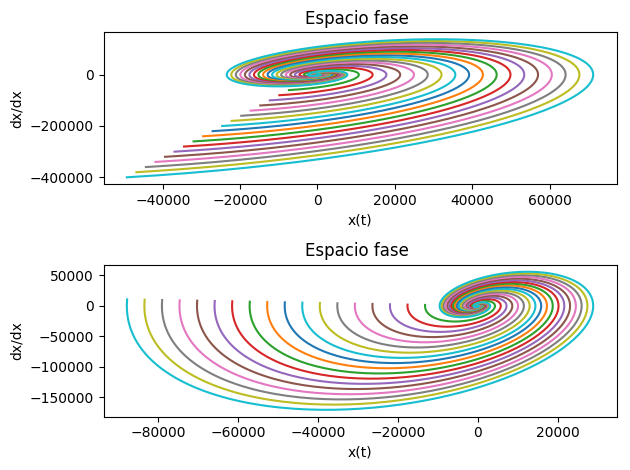

In [26]:
grafica6((t,y)->creadoradef(1, 4, -2,  1)*[y[1],y[2]]
,0,10,[1,2],0.01)

* $a=b=1$, $c=d=0$


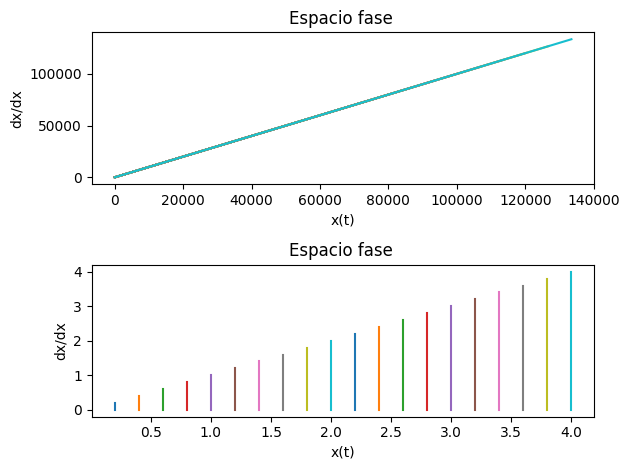

In [27]:
grafica6((t,y)->creadoradef(1, 1, 0,  0)*[y[1],y[2]]
,0,10,[1,2],0.01)

* $a=b=-1$, $c=d=0$


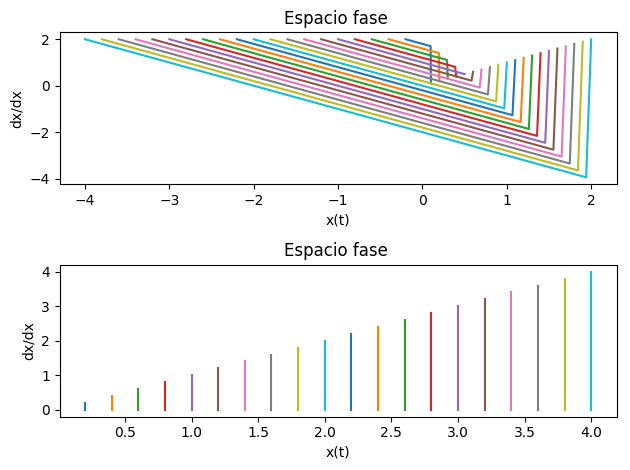

In [28]:
grafica6((t,y)->creadoradef(-1, -1, 0, 0)*[y[1],y[2]]
,0,10,[1,2],0.01)

* $a=1$, $b=-2$, $c=d=0$


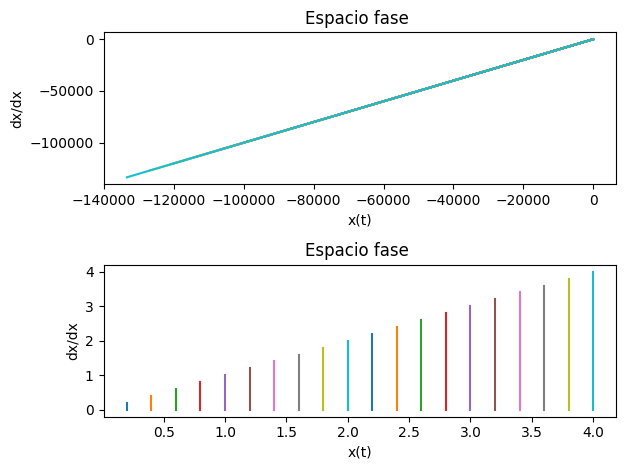

In [29]:
grafica6((t,y)->creadoradef(1, -2, 0, 0 )*[y[1],y[2]]
,0,10,[1,2],0.01)

* $a=1$, $b=-0.5$, $c=d=0$


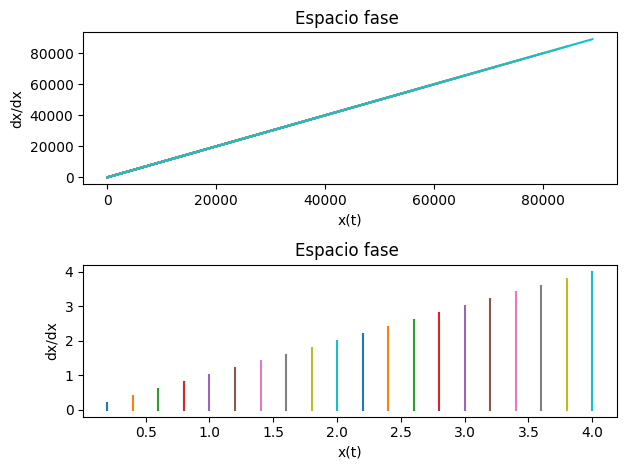

In [30]:
grafica6((t,y)->creadoradef(1, 0.5, 0,  0)*[y[1],y[2]]
,0,10,[1,2],0.01)

* $a=d=0$, $b=-c=1$


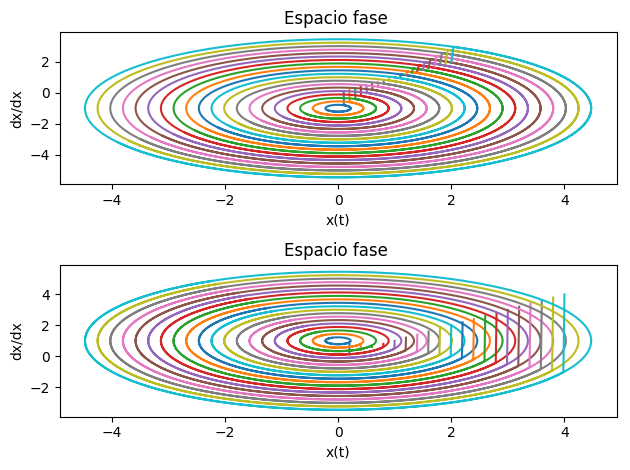

In [31]:
grafica6((t,y)->creadoradef(0, 1, -1,  0)*[y[1],y[2]]
,0,10,[1,2],0.01)

* $a=d=1$, $b=-c=1$


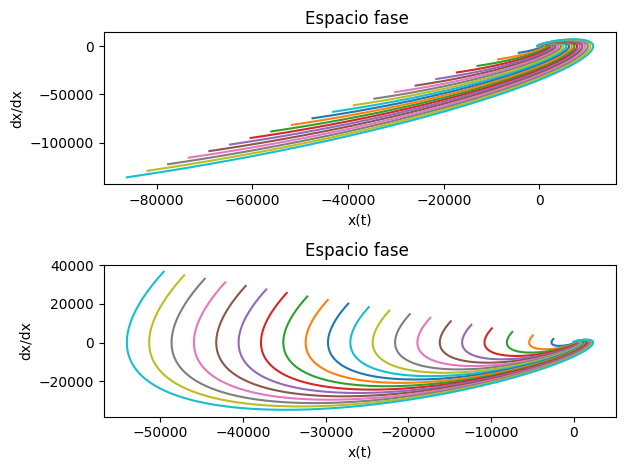

In [32]:
grafica6((t,y)->creadoradef(1, 1, -1,  1)*[y[1],y[2]]
,0,10,[1,2],0.01)

* $a=d=-1$, $b=-c=1$


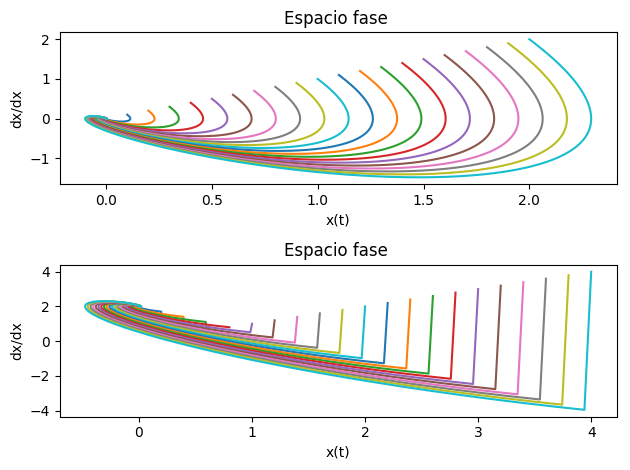

In [33]:
grafica6((t,y)->creadoradef(-1, 1, -1,  -1)*[y[1],y[2]]
,0,10,[1,2],0.01)

* $a=d=-1$, $b=-c=-1$


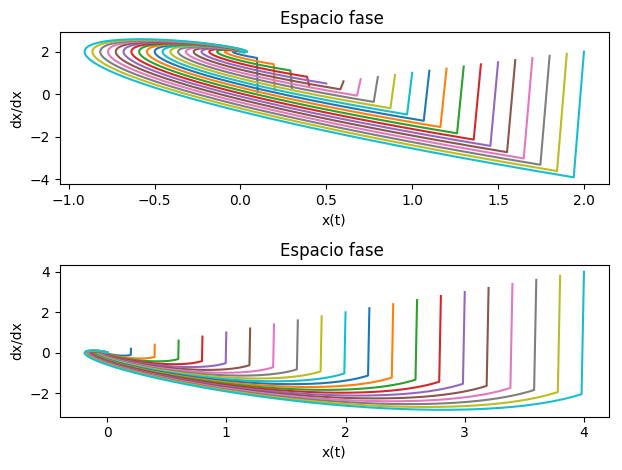

In [34]:
grafica6((t,y)->creadoradef(-1, -1, 1,  -1)*[y[1],y[2]]
,0,10,[1,2],0.01)

* $a=b=d=-1$, $c=0$

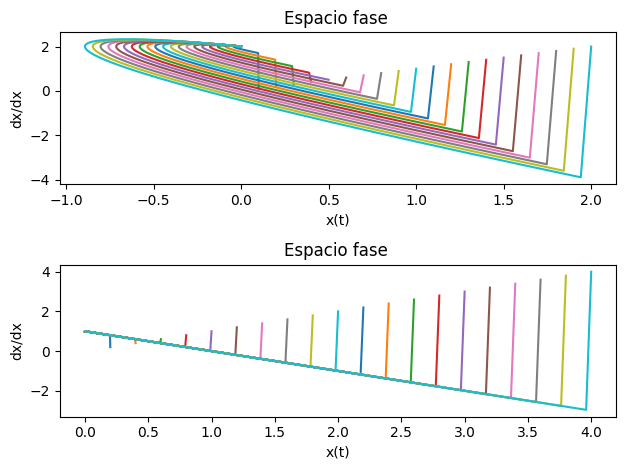

In [35]:
grafica6((t,y)->creadoradef(-1, -1, 0,  -1)*[y[1],y[2]]
,0,10,[1,2],0.01)